# Prev

In [7]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
from gensim.models import AuthorTopicModel
from gensim import matutils
import pickle
import sys
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, spectral_clustering
import numpy as np
sys.path.insert(1, '../')
from helpers.AutTop_pyLDAviz import prepare
import pyLDAvis 
import os
from ray.tune import Analysis
import umap

# Mejor Modelo

In [9]:
ray_path = os.getcwd().replace("/notebooks", "")

In [10]:
analysis_114_104 = Analysis(ray_path + "/ray_results/final_num_topics_111_106")

**Para 104_1114**: **Para 111_106**: Mejor trial 83e4d_00000  
**Para 111_106**: ab6ef_00002

In [11]:
analysis_df = analysis_114_104.dataframe(metric="topic_coherence", mode="max")
best_model_df = analysis_df[analysis_df["trial_id"] == "ab6ef_00002"]
best_model_path = best_model_df["logdir"].values[0]
best_model = AuthorTopicModel.load(best_model_path + '/model.save')


## Corpus, diccionario

In [12]:
with open("pickles/preprocesamiento.pickle", "rb") as f:
    (
        dictionary,
        corpus_train,
        corpus_test,
        author2doc_train,
        author2doc_test,
        train_df,
        test_df
    ) = pickle.load(f) 

print(f'# de autores: {len(author2doc_train)}')
print(f'# tokens unicos: {len(dictionary)}')
print(f'# de documentos: {len(corpus_train)}')

# de autores: 112
# tokens unicos: 17664
# de documentos: 23348


# Explorando

## Topico

### Topico

In [21]:
best_model.show_topic(34)

[('Cup', 5.66123188405797e-05),
 ('tuitear', 5.66123188405797e-05),
 ('Portada', 5.66123188405797e-05),
 ('luisederbez', 5.66123188405797e-05),
 ('via_Universal', 5.66123188405797e-05),
 ('our', 5.66123188405797e-05),
 ('Mexicans', 5.66123188405797e-05),
 ('Promesas', 5.66123188405797e-05),
 ('difusin', 5.66123188405797e-05),
 ('than', 5.66123188405797e-05)]

### Topicos

In [22]:
topicos_sample = best_model.show_topics(num_topics=112, num_words=3, log=False, formatted=False)
# topicos_sample

[(0,
  [('Va ElFinanciero_Mx', 0.023754263454925036),
   ('DAS', 0.01782582703770117),
   ('CORRUPTOS', 0.01782582703770117)]),
 (1,
  [('via_Universal', 5.661231884057971e-05),
   ('luisederbez', 5.661231884057971e-05),
   ('our', 5.661231884057971e-05)]),
 (2,
  [('Y', 0.058487576970645),
   ('Gracias', 0.04966682972231222),
   ('segundo', 0.041335620033310205)]),
 (3,
  [('pontifex', 0.18681070131047942),
   ('Pontifex', 0.05319721654886422),
   ('Huntington', 0.022890054677797315)]),
 (4,
  [('via_Universal', 5.661231884057971e-05),
   ('luisederbez', 5.661231884057971e-05),
   ('our', 5.661231884057971e-05)]),
 (5,
  [('via_Universal', 5.661231884057971e-05),
   ('luisederbez', 5.661231884057971e-05),
   ('our', 5.661231884057971e-05)]),
 (6,
  [('via_Universal', 5.661231884057971e-05),
   ('luisederbez', 5.661231884057971e-05),
   ('our', 5.661231884057971e-05)]),
 (7,
  [('ALAIRE', 0.0731157918866082),
   ('Imagen Radio', 0.0372900866522267),
   ('MsGrandeQueNunca', 0.0286909721

In [27]:
table_per_row = 2
topicos_seleccionados = [10, 36, 42, 53, 72, 106, 45, 29, 75, 11]
for topico in topicos_sample:
    n_topico = topico[0]
    if n_topico in topicos_seleccionados:
        print("\\begin{subtable}{0.4\\textwidth}")
    #     print("\t\\raggedright")
        print("\t\\begin{tabular}{ |c|c| }")
        print("\t\\hline")
        print("\tPalabra & Probabilidad \\tabularnewline")
        print("\t\\hline")
        print("\t\\hline")

        palabras_prob = topico[1]
        for palab, prob in palabras_prob:
            palab_clean = palab.replace('_', '\\_')
            if prob < 0.01:
                print(f"\t{palab_clean} & {prob:.2e} \\tabularnewline")
            else:
                print(f"\t{palab_clean} & {prob:.3f} \\tabularnewline")
        print("\t\\hline")
        print("\t\\end{tabular}")
        print(f"\\caption{{Tópico \\#{n_topico}}}")
        print("\\end{subtable}")
        table_per_row -= 1
        if table_per_row == 0:
            print("\\hfil")
            table_per_row = 2

\begin{subtable}{0.4\textwidth}
	\begin{tabular}{ |c|c| }
	\hline
	Palabra & Probabilidad \tabularnewline
	\hline
	\hline
	via\_Universal & 5.66e-05 \tabularnewline
	luisederbez & 5.66e-05 \tabularnewline
	our & 5.66e-05 \tabularnewline
	\hline
	\end{tabular}
\caption{Tópico \#10}
\end{subtable}

\begin{subtable}{0.4\textwidth}
	\begin{tabular}{ |c|c| }
	\hline
	Palabra & Probabilidad \tabularnewline
	\hline
	\hline
	Vaticano & 0.013 \tabularnewline
	EnLaRed & 0.012 \tabularnewline
	audiencia & 9.73e-03 \tabularnewline
	\hline
	\end{tabular}
\caption{Tópico \#11}
\end{subtable}

\hfil

\begin{subtable}{0.4\textwidth}
	\begin{tabular}{ |c|c| }
	\hline
	Palabra & Probabilidad \tabularnewline
	\hline
	\hline
	Columna & 0.228 \tabularnewline
	TodoPersonal & 0.081 \tabularnewline
	ColumnaDeHoy & 0.048 \tabularnewline
	\hline
	\end{tabular}
\caption{Tópico \#29}
\end{subtable}

\begin{subtable}{0.4\textwidth}
	\begin{tabular}{ |c|c| }
	\hline
	Palabra & Probabilidad \tabularnewline
	\hline
	

In [ ]:
topico

### Top topics

In [ ]:
top_topics = best_model.top_topics(best_model.corpus,topn=4)
top_topics

In [ ]:
for topic in top_topics:
    pass

In [ ]:
topic

### pyLDAviz
Fixing complex error: https://github.com/bmabey/pyLDAvis/pull/158/commits/bc11c729a03b2c2903644d0cb738bd4c06b98057

In [ ]:
vis_data_tsne = prepare(best_model, corpus_train, dictionary, mds='tsne')
pyLDAvis.save_html(vis_data_tsne, "figures/LDA_viz_tsne.html")

In [ ]:
pyLDAvis.__file__

In [ ]:
# Dimension reduction via Jensen-Shannon Divergence & Principal Coordinate Analysis
vis_data_pcoa = prepare(best_model, corpus_train, dictionary)
pyLDAvis.save_html(vis_data_pcoa, "figures/LDA_viz_pcoa.html")

# Autores

In [18]:
author2doc_train_len = {key:len(value) for key, value in author2doc_train.items()}

In [19]:
pd.DataFrame.from_dict(author2doc_train_len, "index").describe()

,0
count,112.000000
mean,208.464286
std,36.990120
min,48.000000
25%,192.500000
50%,223.000000
75%,235.000000
max,240.000000


In [20]:
smallest_author = 0  # Ignore authors with documents less than this.
authors = [best_model.author2id[a] for a in best_model.author2id.keys() if len(best_model.author2doc[a]) >= smallest_author]
author_names = [best_model.id2author[a] for a in authors]

In [21]:
author_names

['ADNPolitico',
 'ActualidadRT',
 'Adela_Micha',
 'Amsalazar',
 'AnaPOrdorica',
 'AristeguiOnline',
 'AztecaNoticias',
 'Canal22',
 'CanalOnceTV',
 'CarlosLoret',
 'CiroGomezL',
 'DeniseDresserG',
 'DeniseMaerker',
 'DiegoEOsorno',
 'E_Q_',
 'EfektoNoticias',
 'EjeCentral',
 'ElFinanciero_Mx',
 'ElHuffPost',
 'El_Universal_Mx',
 'EnfoqueNoticias',
 'Excelsior',
 'ExpansionMx',
 'FedericoArreola',
 'FernandoDworak',
 'Foro_TV',
 'Imagen_Mx',
 'J_Fdz_Menendez',
 'JavierSolorzano',
 'JohnMAckerman',
 'JoseCardenas1',
 'LaRazon_mx',
 'LeonKrauze',
 'LeonardoCurzio',
 'LuisCardenasMx',
 'MarioBeteta',
 'Milenio',
 'NTelevisa_com',
 'NoticiasMVS',
 'Notimex',
 'PPmerino',
 'PabloHiriart',
 'Pajaropolitico',
 'PaolaRojas',
 'PedroFerriz',
 'Pizu',
 'PublimetroMX',
 'Radio_Formula',
 'Reforma',
 'Reporte_Indigo',
 'RicardoAlemanMx',
 'RoyCampos',
 'SGarciaSoto',
 'SalCamarena',
 'SanjuanaMtz',
 'SergioSarmiento',
 'SinEmbargoMX',
 'TapiaFernanda',
 'UnoNoticias',
 'VILLALVAZO13',
 'WRADIOMexic

## Clustering Autores

$$ \Theta =
\begin{pmatrix}
\theta_{a_1t_1} & \theta_{a_1t_2} & \cdots & \theta_{a_1t_k} \\ 
\theta_{a_2t_1} & \theta_{a_1t_2} & \cdots & \theta_{a_2t_k} \\ 
\vdots          & \vdots          & \ddots & \vdots          \\ 
\theta_{a_nt_1} & \theta_{a_1t_2} & \cdots & \theta_{a_nt_k}
\end{pmatrix}
$$

donde:
- $a$:Autor
- $t$: Topico
- $\theta_{a_it_j}$: Probabilidad que el Autor $i$ genere el Topico $j$

In [22]:
matriz_posterior = best_model.state.gamma[authors, :]

matriz_theta = matriz_posterior / matriz_posterior.sum(axis=1, keepdims=1)

### K-means

In [17]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10000,max_iter=300, n_jobs=-1)

kmeans.fit(matriz_posterior)

kmeans.n_iter_

cluster_label = kmeans.labels_

aut_clusters = {aut:label for aut, label in zip(author_names,cluster_label)}

In [18]:
kmeans.n_iter_

2

### TSNE

#### 2D

In [ ]:
tsne2 = TSNE(n_components=2, n_iter=100000, n_jobs=-1, perplexity=5, learning_rate=300)

_ = tsne2.fit_transform(matriz_theta)  # Result stored in tsne.embedding_
print(tsne2.n_iter_)
x2 = tsne2.embedding_[:, 0]
y2 = tsne2.embedding_[:, 1]

df = pd.DataFrame({
    "x": x2, 
    "y": y2, 
    "group": [str(values) for _, values in aut_clusters.items()], 
    "author_name":author_names, 
    "size": 0.1
})

fig = (
    px
    .scatter(df, x='x', y='y', color='group',  hover_name="author_name", size = "size")
#     .update_traces(marker=dict(size=3))
)
fig.show()

In [ ]:
df.to_csv("../graphics/data/kmeans_tsne.csv", index=False)

## Consultas de similitud

In [23]:
author_vecs = [best_model.get_author_topics(author) for author in best_model.id2author.values()]

In [24]:
def similarity(vec1, vec2, model):
    '''Get similarity between two vectors'''
    dist = matutils.hellinger(matutils.sparse2full(vec1, model.num_topics), \
                              matutils.sparse2full(vec2, model.num_topics))
    sim = 1.0 / (1.0 + dist)
    return sim

def get_sims(vec, model):
    '''Get similarity of vector to all authors.'''
    sims = [similarity(vec, vec2, model) for vec2 in author_vecs]
    return sims

def get_table(name, model,top_n=10):
    '''
    Get table with similarities, author names, and author sizes.
    Return `top_n` authors as a dataframe.
    
    '''
    
    # Get similarities.
    sims = get_sims(model.get_author_topics(name), model)

    # Arrange author names, similarities, and author sizes in a list of tuples.
    table = []
    for elem in enumerate(sims):
        author_name = model.id2author[elem[0]]
        sim = elem[1]
        table.append((author_name, sim))
            
    # Make dataframe and retrieve top authors.
    df = pd.DataFrame(table, columns=['autor', name])
    df = df.sort_values(name, ascending=False)[:top_n]
    
    return df.set_index("autor")

In [25]:
aut_queries_list = []
for autor in author_names:
    aut_queries_list.append(get_table(autor, best_model, 112))

In [26]:
aut_queries_df = pd.concat(aut_queries_list, axis=1).sort_index()

In [27]:
aut_queries_df.to_csv("../graphics/data/similarity_matrix.csv")

In [28]:
aut_queries_df.applymap(lambda x: round(x,2))

,ADNPolitico,ActualidadRT,Adela_Micha,Amsalazar,AnaPOrdorica,AristeguiOnline,AztecaNoticias,Canal22,CanalOnceTV,CarlosLoret,...,panchogarfias,politicomx,puigcarlos,revistaproceso,rivapa,sacroprofano,sdpnoticias,sergioaguayo,sopitas,warkentin
ADNPolitico,1.00,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,...,0.60,0.59,0.57,0.56,0.54,0.52,0.55,0.56,0.56,0.53
ActualidadRT,0.50,1.00,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,...,0.54,0.54,0.55,0.55,0.53,0.58,0.55,0.50,0.55,0.53
Adela_Micha,0.50,0.50,1.00,0.50,0.50,0.50,0.50,0.50,0.50,0.50,...,0.54,0.53,0.50,0.50,0.52,0.52,0.50,0.56,0.56,0.55
Amsalazar,0.50,0.50,0.50,1.00,0.50,0.50,0.50,0.50,0.50,0.50,...,0.50,0.50,0.52,0.50,0.63,0.53,0.52,0.51,0.52,0.54
AnaPOrdorica,0.50,0.50,0.50,0.50,1.00,0.50,0.50,0.50,0.50,0.50,...,0.52,0.55,0.58,0.56,0.53,0.53,0.56,0.56,0.53,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sacroprofano,0.52,0.58,0.52,0.53,0.53,0.54,0.54,0.53,0.54,0.56,...,0.67,0.68,0.68,0.69,0.64,1.00,0.71,0.63,0.69,0.69
sdpnoticias,0.55,0.55,0.50,0.52,0.56,0.56,0.57,0.53,0.54,0.53,...,0.72,0.78,0.79,0.81,0.66,0.71,1.00,0.69,0.73,0.70
sergioaguayo,0.56,0.50,0.56,0.51,0.56,0.58,0.53,0.53,0.56,0.52,...,0.69,0.72,0.70,0.67,0.64,0.63,0.69,1.00,0.69,0.73
sopitas,0.56,0.55,0.56,0.52,0.53,0.53,0.56,0.54,0.52,0.54,...,0.76,0.75,0.70,0.71,0.64,0.69,0.73,0.69,1.00,0.72


$$ Q =
\begin{pmatrix}
1 & q_{a_1a_2} & \cdots & q_{a_1a_k} \\ 
q_{a_2a_1} & 1 & \cdots & q_{a_2a_k} \\ 
\vdots          & \vdots          & \ddots & \vdots          \\ 
q_{a_na_1} & q_{a_1a_2} & \cdots & 1
\end{pmatrix}
$$

donde:
- $a_i$: Autor $i$
- $q_{a_ia_j}$: Similitud(distancia) entre el autor $i$ y el autor $j$

In [29]:
# fig = px.imshow(aut_queries_df)
# fig.show()

### Spectral clustering

In [30]:
labels = spectral_clustering(aut_queries_df.to_numpy(), n_clusters=4, affinity="precomputed")

#### Clusters

In [51]:
grupos = aut_queries_df.reset_index().assign(grupo=labels).rename(columns={"index": "Autor"}).sort_values(by=['Autor'])

In [60]:
print(grupos.query("grupo == 3").to_latex(columns=["Autor"], index=False))

\begin{tabular}{l}
\toprule
           Autor \\
\midrule
  javieraparicio \\
  jenarovillamil \\
    jairocalixto \\
      politicomx \\
   panchogarfias \\
          jrisco \\
         maurimm \\
     mariocampos \\
  julioastillero \\
      kdartigues \\
    sergioaguayo \\
    lydiacachosi \\
 SergioSarmiento \\
    genarolozano \\
      ElHuffPost \\
  FernandoDworak \\
  J\_Fdz\_Menendez \\
     MarioBeteta \\
     NoticiasMVS \\
        PPmerino \\
    PabloHiriart \\
      PaolaRojas \\
     PedroFerriz \\
 RicardoAlemanMx \\
       RoyCampos \\
     SGarciaSoto \\
     SalCamarena \\
     SanjuanaMtz \\
         sopitas \\
   TapiaFernanda \\
    VILLALVAZO13 \\
   YuririaSierra \\
    aguilarcamin \\
    andreslajous \\
   arturoangel20 \\
   beltrandelrio \\
 carloselizondom \\
   dmorenochavez \\
 epigmenioibarra \\
 esquivelgerardo \\
        estarc62 \\
      hdemauleon \\
       warkentin \\
\bottomrule
\end{tabular}



### TSNe

999


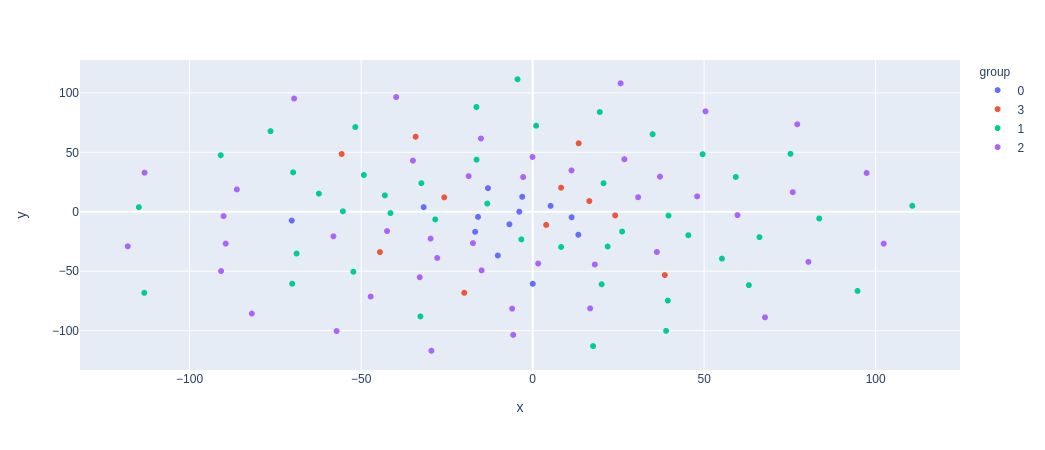

In [26]:
tsne_sq = TSNE(n_components=2, n_iter=1000, n_jobs=-1, metric="precomputed", perplexity=10)

_ = tsne_sq.fit_transform(aut_queries_df)  # Result stored in tsne.embedding_
print(tsne_sq.n_iter_)
x2 = tsne_sq.embedding_[:, 0]
y2 = tsne_sq.embedding_[:, 1]

df_sq = pd.DataFrame({
    "x": x2, 
    "y": y2, 
    "group": [str(values) for values in labels], 
    "author_name":author_names
})

fig = (
    px
    .scatter(df_sq, x='x', y='y', color='group',  hover_name="author_name")
)
fig.show()

### UMAP

In [ ]:
aut_queries_df

### UMAP

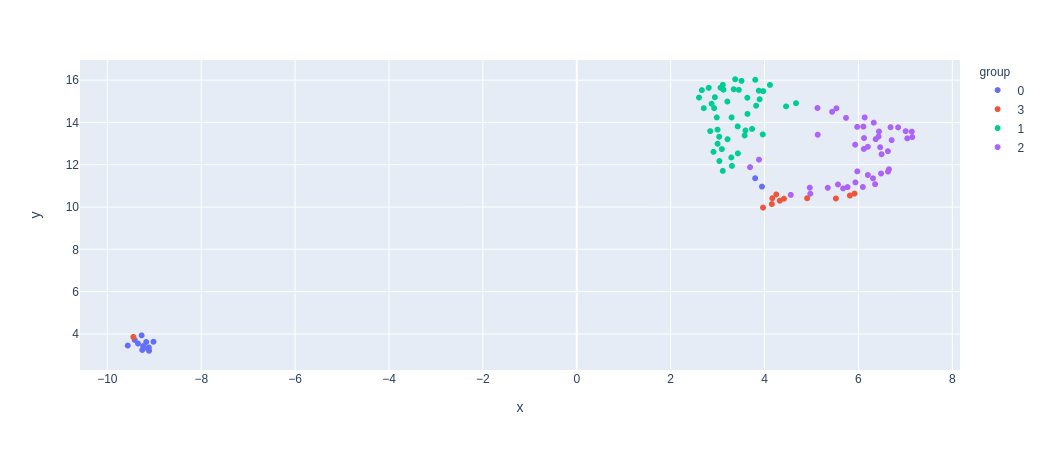

In [25]:
embedding = umap.UMAP(random_state=308605378).fit_transform(aut_queries_df)

x_umap = embedding[:,0]
y_umap = embedding[:,1]

df_umap = pd.DataFrame({
    "x": x_umap, 
    "y": y_umap, 
    "group": [str(values) for values in labels], 
    "author_name":author_names
})

fig = (
    px
    .scatter(df_umap, x='x', y='y', color='group',  hover_name="author_name")
)
fig.show()

In [27]:
df_umap.to_csv("../graphics/data/df_umap.csv")

### UMAP supervised

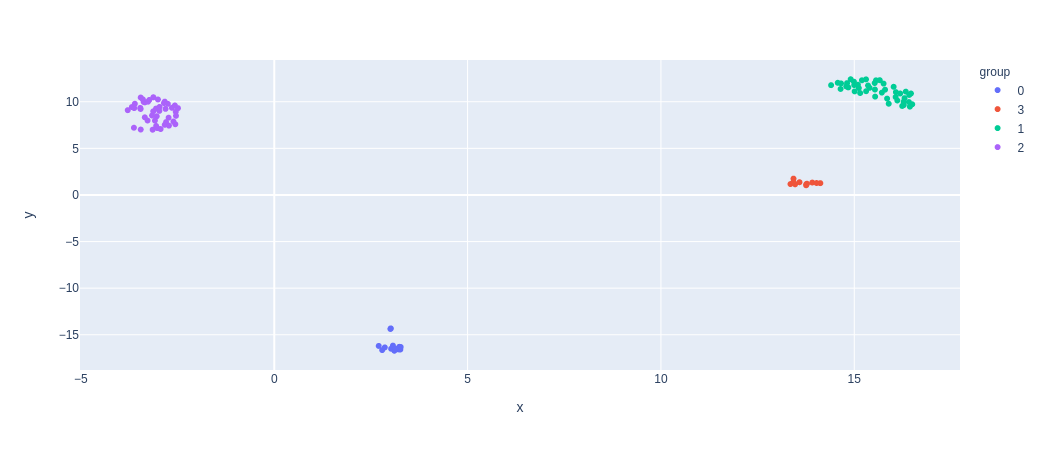

In [28]:
embedding = umap.UMAP(random_state=308605378).fit_transform(aut_queries_df, y = labels)

x_umap = embedding[:,0]
y_umap = embedding[:,1]

df_umap = pd.DataFrame({
    "x": x_umap, 
    "y": y_umap, 
    "group": [str(values) for values in labels], 
    "author_name":author_names
})

fig = (
    px
    .scatter(df_umap, x='x', y='y', color='group',  hover_name="author_name")
)
fig.show()

In [29]:
df_umap.to_csv("../graphics/data/df_umap_supervisado.csv")